# DATA VISUALIZATION AND DATA ANALYSIS

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
Data = pd.read_csv('SYMPTOMS.csv', usecols=['label','text'])
Data.head()

,label,text
0,Psoriasis,I have been experiencing a skin rash on my arm...
1,Psoriasis,"My skin has been peeling, especially on my kne..."
2,Psoriasis,I have been experiencing joint pain in my fing...
3,Psoriasis,"There is a silver like dusting on my skin, esp..."
4,Psoriasis,"My nails have small dents or pits in them, and..."


In [4]:
Data.tail()

,label,text
1195,diabetes,I'm shaking and trembling all over. I've lost ...
1196,diabetes,"Particularly in the crevices of my skin, I hav..."
1197,diabetes,I regularly experience these intense urges and...
1198,diabetes,"I have trouble breathing, especially outside. ..."
1199,diabetes,I constantly sneeze and have a dry cough. My i...


In [5]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
Data['label'] = label_encoder.fit_transform(Data['label'])

<Axes: xlabel='label', ylabel='count'>

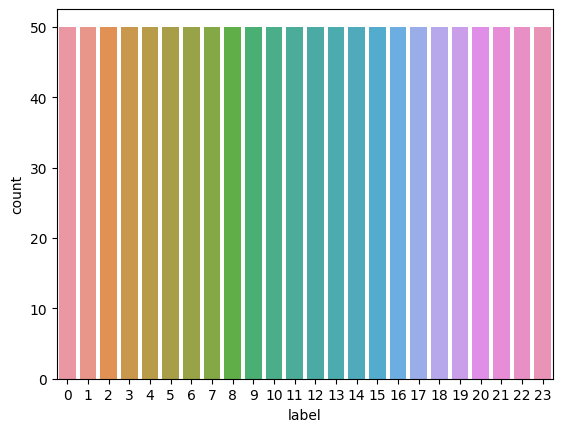

In [6]:
sns.countplot(x='label',data=Data)

(array([150., 100., 100., 150., 100., 100., 150., 100., 100., 150.]),
 array([ 0. ,  2.3,  4.6,  6.9,  9.2, 11.5, 13.8, 16.1, 18.4, 20.7, 23. ]),
 <BarContainer object of 10 artists>)

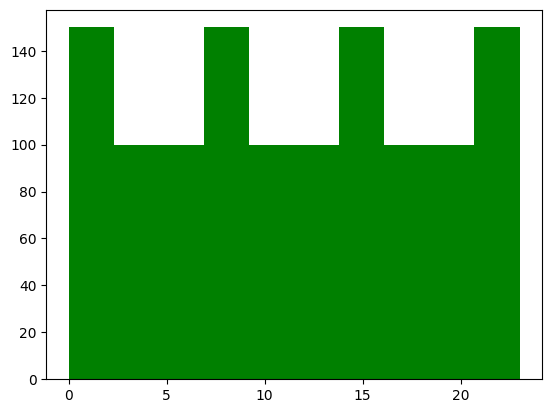

In [7]:
plt.hist(Data['label'],color='green')

<Axes: ylabel='Density'>

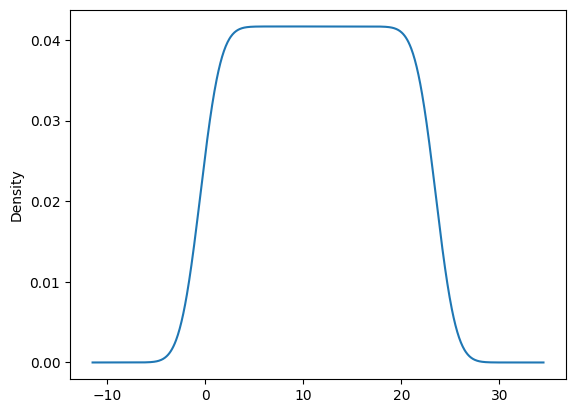

In [8]:
Data['label'].plot(kind='density')

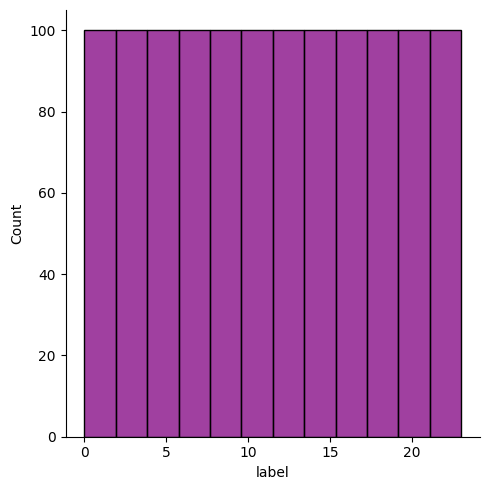

In [9]:
sns.displot(Data['label'], color='purple') 

<Axes: >

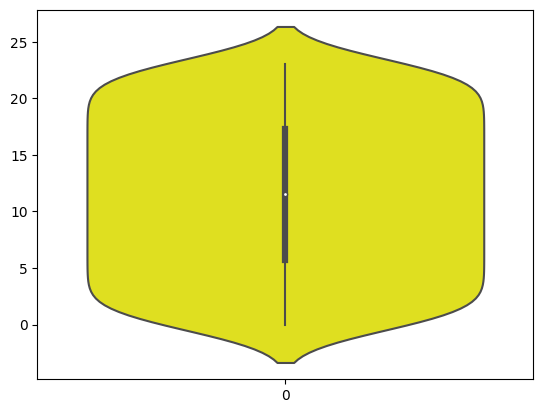

In [10]:
sns.violinplot(Data['label'], color='yellow') 

<Axes: xlabel='label', ylabel='Proportion'>

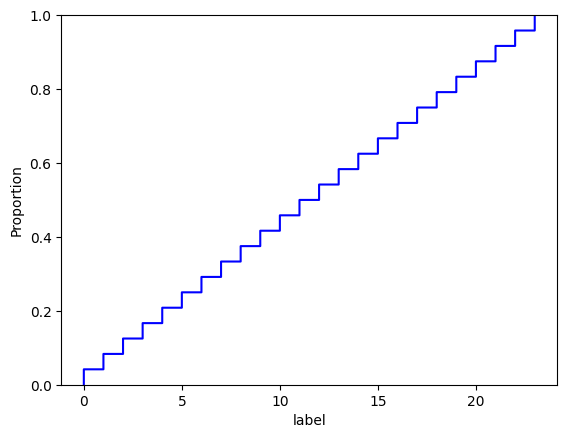

In [11]:
sns.ecdfplot(Data['label'], color='blue') 

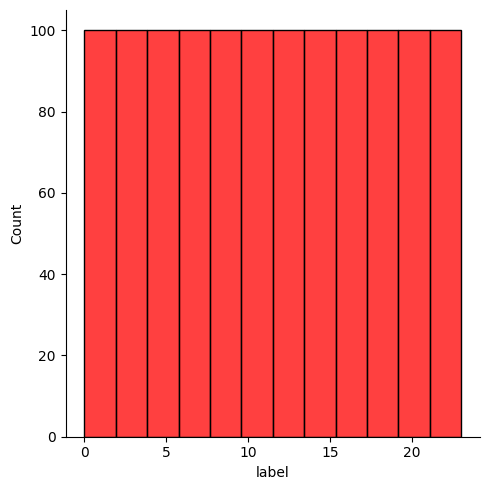

In [12]:
sns.displot(Data['label'], color='RED') 

In [13]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [14]:
# Define preprocess function for text preprocessing

def preprocess_text(text):
    
    # Check for NaN values and handle them
    
    if pd.isnull(text):
        return ""
    
    # Convert to lowercase
    
    text = text.lower()
    
    # Remove special characters and digits
    
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Tokenization and remove stop words
    
    stop_words = set(stopwords.words('english'))
    
    words = [word for word in word_tokenize(text) if word not in stop_words]
    
    # Stemming
    
    ps = PorterStemmer()
    
    words = [ps.stem(word) for word in words]
    
    # Join the preprocessed words back into a single string
    
    preprocessed_text = ' '.join(words)
    
    return preprocessed_text

In [15]:
Data['text'] = Data['text'].apply(preprocess_text)

In [16]:
from sklearn.model_selection import train_test_split

X,X_test,y,y_test = train_test_split(Data.loc[:,'text':],Data['label'],test_size=0.2)

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

(-0.5, 799.5, 799.5, -0.5)

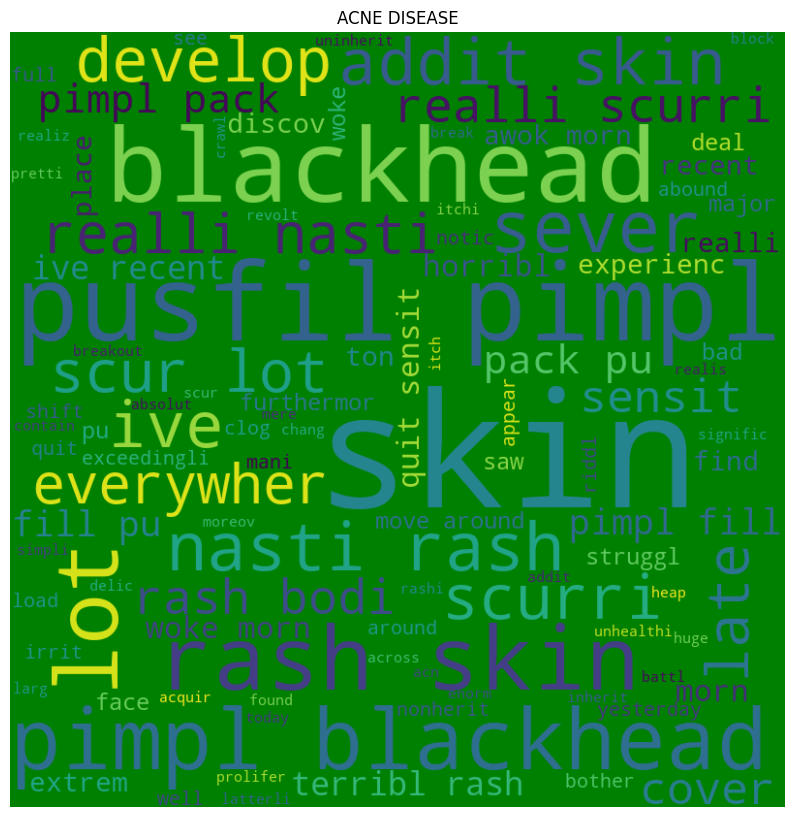

In [18]:
ACNE = ' '.join(Data.loc[Data['label'] == 0, 'text'].values)
ACNE_text = WordCloud(background_color='GREEN',max_words=2000,width = 800, height = 800).generate(ACNE)

plt.figure(figsize=[10,30])

plt.imshow(ACNE_text,interpolation='bilinear')
plt.title('ACNE DISEASE')
plt.axis('off')

Text(0.5, 1.0, 'ALLERGY')

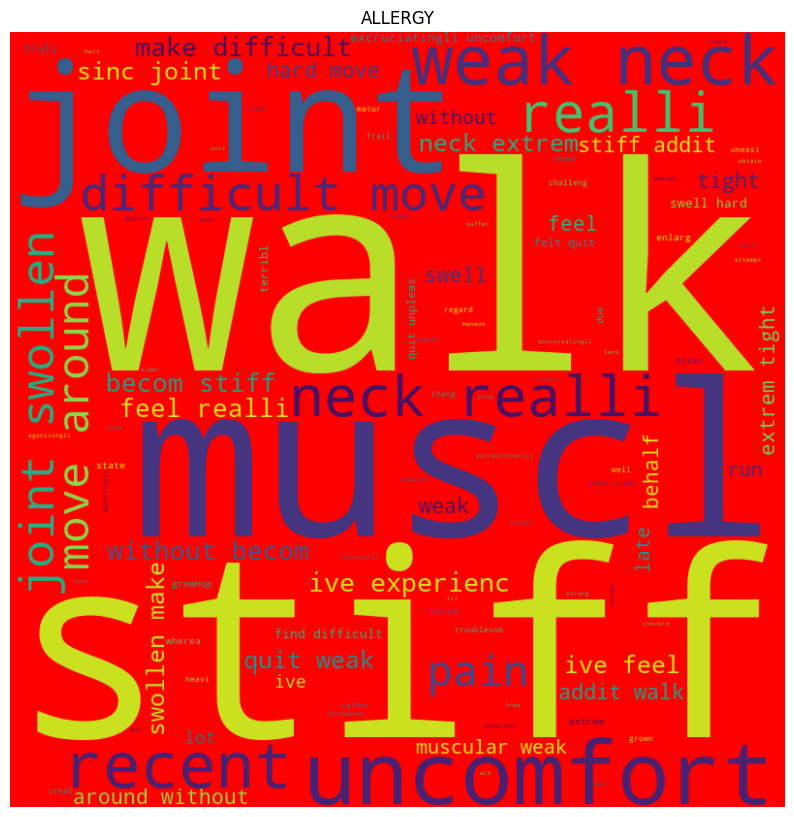

In [19]:
ALLERGY = ' '.join(Data.loc[Data['label'] == 1, 'text'].values)
ALLERGY_text = WordCloud(background_color='RED',max_words=2000,width = 800, height = 800).generate(ALLERGY)

plt.figure(figsize=[10,30])

plt.imshow(ALLERGY_text, interpolation='bilinear')
plt.axis('off')
plt.title('ALLERGY')

Text(0.5, 1.0, 'CHICKENPOX')

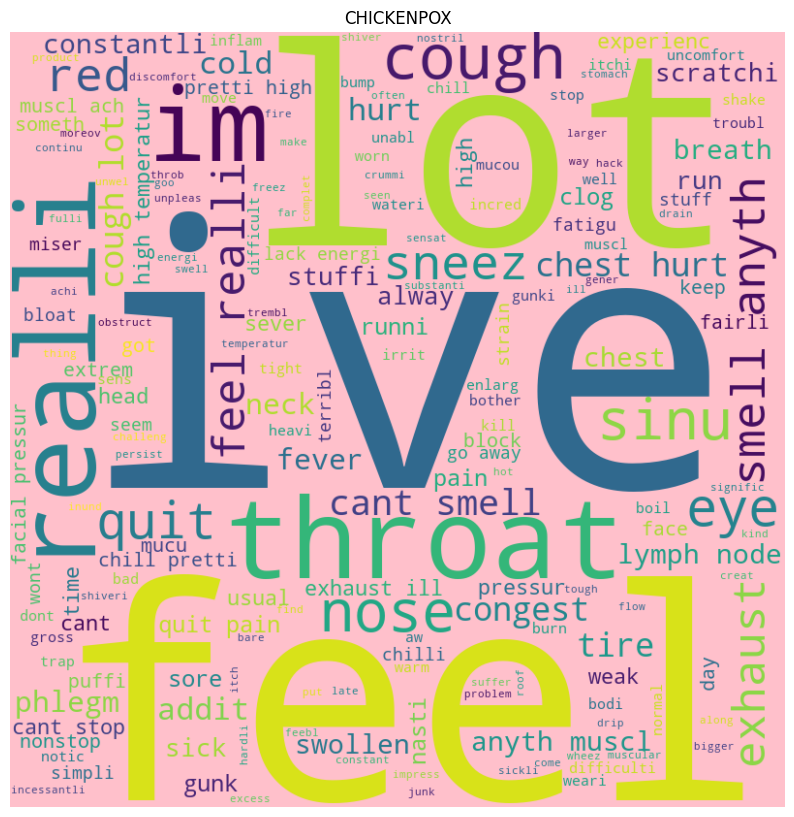

In [20]:
CHICKENPOX = ' '.join(Data.loc[Data['label'] == 5, 'text'].values)
CHICKENPOX_text = WordCloud(background_color='PINK',max_words=2000,width = 800, height = 800).generate(CHICKENPOX)

plt.figure(figsize=[10,30])

plt.imshow(CHICKENPOX_text, interpolation='bilinear')
plt.axis('off')
plt.title('CHICKENPOX')